In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

__requires__= 'numpy==1.22.3'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import graphviz 
import sklearn
from sklearn import tree

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
!pip install PyPDF2
import PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.8 MB/s eta 0:00:00


In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
print(train.head())
train.columns
set(list(train["MSSubClass"][:]))
type(list(train["PoolQC"][:])[0])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

float

In [4]:
def data_prep_dict(dataFrame):
    columns = dataFrame.columns
    getUniqVals = lambda column : set(list(column))
    dataFrameDict = {}
    for column in columns:
        columnUniqVals = getUniqVals(dataFrame.loc[:, column])
        auxDict = {}
        for (idx, val) in enumerate(columnUniqVals):
            if type(val) == str:
                auxDict[str(val)] = idx 
            try:
                if math.isnan(val):
                    auxDict[val] = idx
            except:
                pass
        dataFrameDict[column] = auxDict
    
    for column in columns:
        if dataFrameDict[column] == {}:
            dataFrameDict.pop(column)
        
        
    return dataFrameDict

#print(data_prep_dict(train))
trainDict = data_prep_dict(train)

def data_prep(dataFrame, dataFrameDict, test = 0):
    dataFrameDictCollapsed = {}
    for key in list(dataFrameDict.keys()):
        dataFrameDictCollapsed.update(dataFrameDict[key])
    dataFrame = dataFrame.replace(dataFrameDictCollapsed)
    X = dataFrame.loc[:, "Id":"SaleCondition"]
    if not test:
        Y = dataFrame.loc[:, "SalePrice"]
        return X, Y
    else:
        return X

print(data_prep(train.head(15), trainDict))
XTrainHead, YTrainHead = data_prep(train.head(15), trainDict)
XTestHead = data_prep(test.head(15), trainDict, test = 1)

(    Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0    1          60         1         65.0     8450       2  176.0         0   
1    2          20         1         80.0     9600       2  176.0         0   
2    3          60         1         68.0    11250       2  176.0         3   
3    4          70         1         60.0     9550       2  176.0         3   
4    5          60         1         84.0    14260       2  176.0         3   
5    6          50         1         85.0    14115       2  176.0         3   
6    7          20         1         75.0    10084       2  176.0         0   
7    8          60         1        176.0    10382       2  176.0         3   
8    9          50         3         51.0     6120       2  176.0         0   
9   10         190         1         50.0     7420       2  176.0         0   
10  11          20         1         70.0    11200       2  176.0         0   
11  12          60         1         85.0    11924 

None


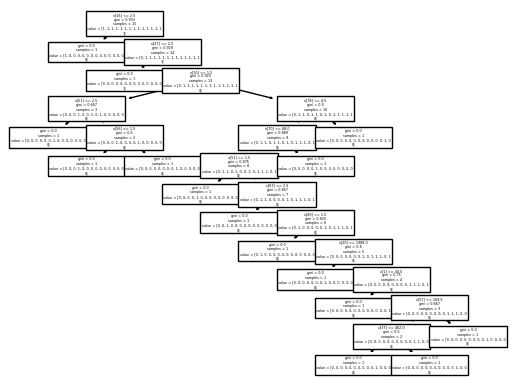

In [5]:
def tree_classifier(X, Y):
    classifier = tree.DecisionTreeClassifier()
    classifier.fit(X, Y)
    tree.plot_tree(classifier)
    
print(tree_classifier(XTrainHead, YTrainHead))

[144000 157000 129500 140000 129900 181500 181500 140000 140000 144000
 129900 129900 129900 129900 129900]


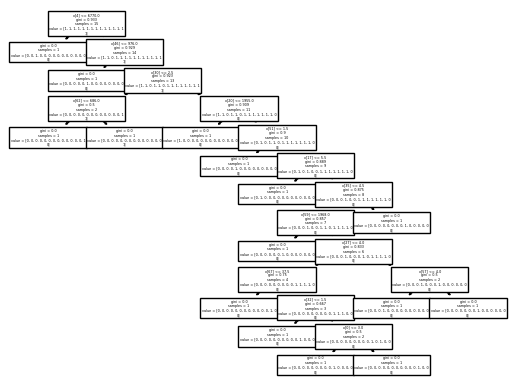

In [6]:
#someTree = my_tree.DecisionTreeClassifier()
#someTree2 = my_tree
#print(dir(someTree))
#print(dir(someTree2))
#print(type(my_tree.DecisionTreeClassifier()))
#print(type(my_tree))


class TreeClassifier():
    def __init__(self):
        
        classifier = None
    
    def train(self, X, Y):
        classifier = tree.DecisionTreeClassifier()
        classifier.fit(X, Y)
        self.classifier = classifier
        return self
    
    def plt(self):
        tree.plot_tree(self.classifier)
        dot_data = tree.export_graphviz(self.classifier, out_file=None, filled=True, rounded=True, special_characters=True)
        graph = graphviz.Source(dot_data)  
        graph.render("myDecisionTree")
#        f = open('/kaggle/working/myDecisionTree.pdf','rb')
#        pdf_reader = PyPDF2.PdfReader(f)
#        page = pdf_reader.pages[0]
#        
#        count = 0
#
#        for image_file_object in page.images:
#            with open(str(count) + image_file_object.name, "wb") as fp:
#                fp.write(image_file_object.data)
#                count += 1
    
    def pred(self, X, Y):
        self.predictions = self.classifier.predict(X)
        print(self.predictions)
        return self
        
Tree = TreeClassifier()
Tree.train(XTrainHead, YTrainHead)
Tree.plt()  
Tree.pred(XTestHead, YTrainHead)
    